# Day 2

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

print(pd.__version__)

2.2.2


In [39]:
df = pd.read_csv("https://raw.githubusercontent.com/supertypeai/idx_total_historical_1995/main/market_cap_history.csv")
df.head()

,year,currency,market_cap
0,1995,USD,66584940000
1,1996,USD,90997080000
2,1997,USD,29050020000
3,1998,USD,22077860000
4,1999,USD,64044670000


In [40]:
df.tail(3)

,year,currency,market_cap
26,2021,USD,508910310810
27,2022,USD,585567160730
28,2023,USD,717936458435


In [41]:
df.describe()

,year,market_cap
count,29.000000,2.900000e+01
mean,2009.000000,2.686925e+11
std,8.514693,2.135491e+11
min,1995.000000,2.207786e+10
25%,2002.000000,6.658494e+10
50%,2009.000000,2.149415e+11
75%,2016.000000,4.282226e+11
max,2023.000000,7.179365e+11


In [42]:
df.dtypes

year           int64
currency      object
market_cap     int64
dtype: object

In [43]:
df['year'] = pd.to_datetime(df['year'], format="%Y")
df.dtypes

year          datetime64[ns]
currency              object
market_cap             int64
dtype: object

In [44]:
df[(df['currency'] == 'USD') & (df['market_cap'] == 66584940000)]

,year,currency,market_cap
0,1995-01-01,USD,66584940000


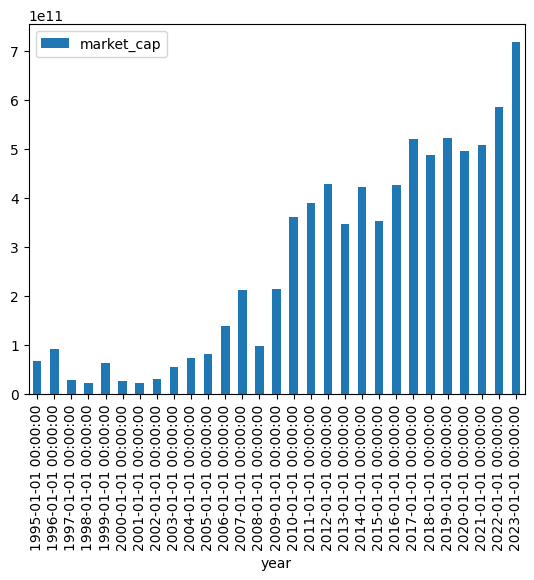

In [45]:
df.plot(x='year', y='market_cap', kind='bar')
plt.show()

In [46]:
df.columns

Index(['year', 'currency', 'market_cap'], dtype='object')

In [47]:
df.index

RangeIndex(start=0, stop=29, step=1)

In [48]:
df.set_index('year', inplace=True) # in-place = nge fix perubahan
df.head()

,currency,market_cap
year,,
1995-01-01,USD,66584940000
1996-01-01,USD,90997080000
1997-01-01,USD,29050020000
1998-01-01,USD,22077860000
1999-01-01,USD,64044670000


In [49]:
# loc: locator non index, locate row by the NAME of the row
df.loc["1999-01-01"]

currency              USD
market_cap    64044670000
Name: 1999-01-01 00:00:00, dtype: object

In [50]:
df.tail()

,currency,market_cap
year,,
2019-01-01,USD,523321860000
2020-01-01,USD,496086050000
2021-01-01,USD,508910310810
2022-01-01,USD,585567160730
2023-01-01,USD,717936458435


In [51]:
#iloc: index locator, mencari row berdasarkan INDEX
df.iloc[-1]

currency               USD
market_cap    717936458435
Name: 2023-01-01 00:00:00, dtype: object

In [52]:
df.iloc[0:10] # ex 10

,currency,market_cap
year,,
1995-01-01,USD,66584940000
1996-01-01,USD,90997080000
1997-01-01,USD,29050020000
1998-01-01,USD,22077860000
1999-01-01,USD,64044670000
2000-01-01,USD,26812500000
2001-01-01,USD,22997860000
2002-01-01,USD,30066960000
2003-01-01,USD,54659060000


In [53]:
df.iloc[-5:] # tail()

,currency,market_cap
year,,
2019-01-01,USD,523321860000
2020-01-01,USD,496086050000
2021-01-01,USD,508910310810
2022-01-01,USD,585567160730
2023-01-01,USD,717936458435


In [54]:
df.loc[['2020-01-01', '2023-01-01']]

,currency,market_cap
year,,
2020-01-01,USD,496086050000
2023-01-01,USD,717936458435


In [55]:
df['market_cap_change_%'] = df['market_cap'].pct_change() # the percentage change with previous value
df

,currency,market_cap,market_cap_change_%
year,,,
1995-01-01,USD,66584940000,NaN
1996-01-01,USD,90997080000,0.366632
1997-01-01,USD,29050020000,-0.680759
1998-01-01,USD,22077860000,-0.240005
1999-01-01,USD,64044670000,1.900855
2000-01-01,USD,26812500000,-0.581347
2001-01-01,USD,22997860000,-0.142271
2002-01-01,USD,30066960000,0.307381
2003-01-01,USD,54659060000,0.817911


In [56]:
df['market_cap_change_value'] = df['market_cap'].diff() / 1e9 # get value diff divided by 10^9
df

,currency,market_cap,market_cap_change_%,market_cap_change_value
year,,,,
1995-01-01,USD,66584940000,NaN,NaN
1996-01-01,USD,90997080000,0.366632,24.412140
1997-01-01,USD,29050020000,-0.680759,-61.947060
1998-01-01,USD,22077860000,-0.240005,-6.972160
1999-01-01,USD,64044670000,1.900855,41.966810
2000-01-01,USD,26812500000,-0.581347,-37.232170
2001-01-01,USD,22997860000,-0.142271,-3.814640
2002-01-01,USD,30066960000,0.307381,7.069100
2003-01-01,USD,54659060000,0.817911,24.592100


In [57]:
df["change_direction"] = df["market_cap_change_%"].apply(lambda x: "Winning" if x >= 0 else "Ouh Dang It")
df

,currency,market_cap,market_cap_change_%,market_cap_change_value,change_direction
year,,,,,
1995-01-01,USD,66584940000,NaN,NaN,Ouh Dang It
1996-01-01,USD,90997080000,0.366632,24.412140,Winning
1997-01-01,USD,29050020000,-0.680759,-61.947060,Ouh Dang It
1998-01-01,USD,22077860000,-0.240005,-6.972160,Ouh Dang It
1999-01-01,USD,64044670000,1.900855,41.966810,Winning
2000-01-01,USD,26812500000,-0.581347,-37.232170,Ouh Dang It
2001-01-01,USD,22997860000,-0.142271,-3.814640,Ouh Dang It
2002-01-01,USD,30066960000,0.307381,7.069100,Winning
2003-01-01,USD,54659060000,0.817911,24.592100,Winning


# Day 2

In [58]:
df.tail()

,currency,market_cap,market_cap_change_%,market_cap_change_value,change_direction
year,,,,,
2019-01-01,USD,523321860000,0.075100,36.555940,Winning
2020-01-01,USD,496086050000,-0.052044,-27.235810,Ouh Dang It
2021-01-01,USD,508910310810,0.025851,12.824261,Winning
2022-01-01,USD,585567160730,0.150629,76.656850,Winning
2023-01-01,USD,717936458435,0.226053,132.369298,Winning


In [59]:
growth_year = df[(df['market_cap_change_%'] * 100 >= 10.0)].copy()
growth_year[['market_cap_change_%']]

,market_cap_change_%
year,
1996-01-01,0.366632
1999-01-01,1.900855
2002-01-01,0.307381
2003-01-01,0.817911
2004-01-01,0.340137
2005-01-01,0.111637
2006-01-01,0.705631
2007-01-01,0.524217
2009-01-01,1.176389


In [60]:
print(f"there are {growth_year.shape[0]} years where IDX recorded a > 10% yoy growth")

there are 15 years where IDX recorded a > 10% yoy growth


In [61]:
print(growth_year['market_cap_change_%'].idxmax())
print(growth_year['market_cap_change_%'].idxmin())

1999-01-01 00:00:00
2005-01-01 00:00:00


In [62]:
growth_year[growth_year['market_cap_change_%'] == growth_year['market_cap_change_%'].min()]


,currency,market_cap,market_cap_change_%,market_cap_change_value,change_direction
year,,,,,
2005-01-01,USD,81428120000,0.111637,8.17748,Winning


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29 entries, 1995-01-01 to 2023-01-01
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   currency                 29 non-null     object 
 1   market_cap               29 non-null     int64  
 2   market_cap_change_%      28 non-null     float64
 3   market_cap_change_value  28 non-null     float64
 4   change_direction         29 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 2.4+ KB


In [64]:
df[['market_cap_change_value']].head(10)

,market_cap_change_value
year,
1995-01-01,NaN
1996-01-01,24.41214
1997-01-01,-61.94706
1998-01-01,-6.97216
1999-01-01,41.96681
2000-01-01,-37.23217
2001-01-01,-3.81464
2002-01-01,7.06910
2003-01-01,24.59210


# 1

In [65]:
df[['market_cap_change_value']].head(10).median()

market_cap_change_value    7.0691
dtype: float64

# 2

In [66]:
df[df['market_cap_change_%'] == df['market_cap_change_%'].max()]


,currency,market_cap,market_cap_change_%,market_cap_change_value,change_direction
year,,,,,
1999-01-01,USD,64044670000,1.900855,41.96681,Winning


# 3

In [67]:
x = df[df['market_cap_change_%'] * 100 < - 50].copy()
x


,currency,market_cap,market_cap_change_%,market_cap_change_value,change_direction
year,,,,,
1997-01-01,USD,29050020000,-0.680759,-61.94706,Ouh Dang It
2000-01-01,USD,26812500000,-0.581347,-37.23217,Ouh Dang It
2008-01-01,USD,98760600000,-0.533472,-112.93237,Ouh Dang It


In [69]:
print(f"There are {x.shape[0]} years having market caps change % below -50%")

There are 3 years having market caps change % below -50%


# 4

In [79]:
df.iloc[-5:]["market_cap_change_value"].mean()

46.234107687

In [80]:
df.iloc[-5:]["market_cap_change_%"].mean()

0.08511779062930729

# 5

In [81]:
df.groupby('change_direction')['market_cap_change_value'].median()

change_direction
Ouh Dang It   -37.23217
Winning        41.96681
Name: market_cap_change_value, dtype: float64